Summary Statistics:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02

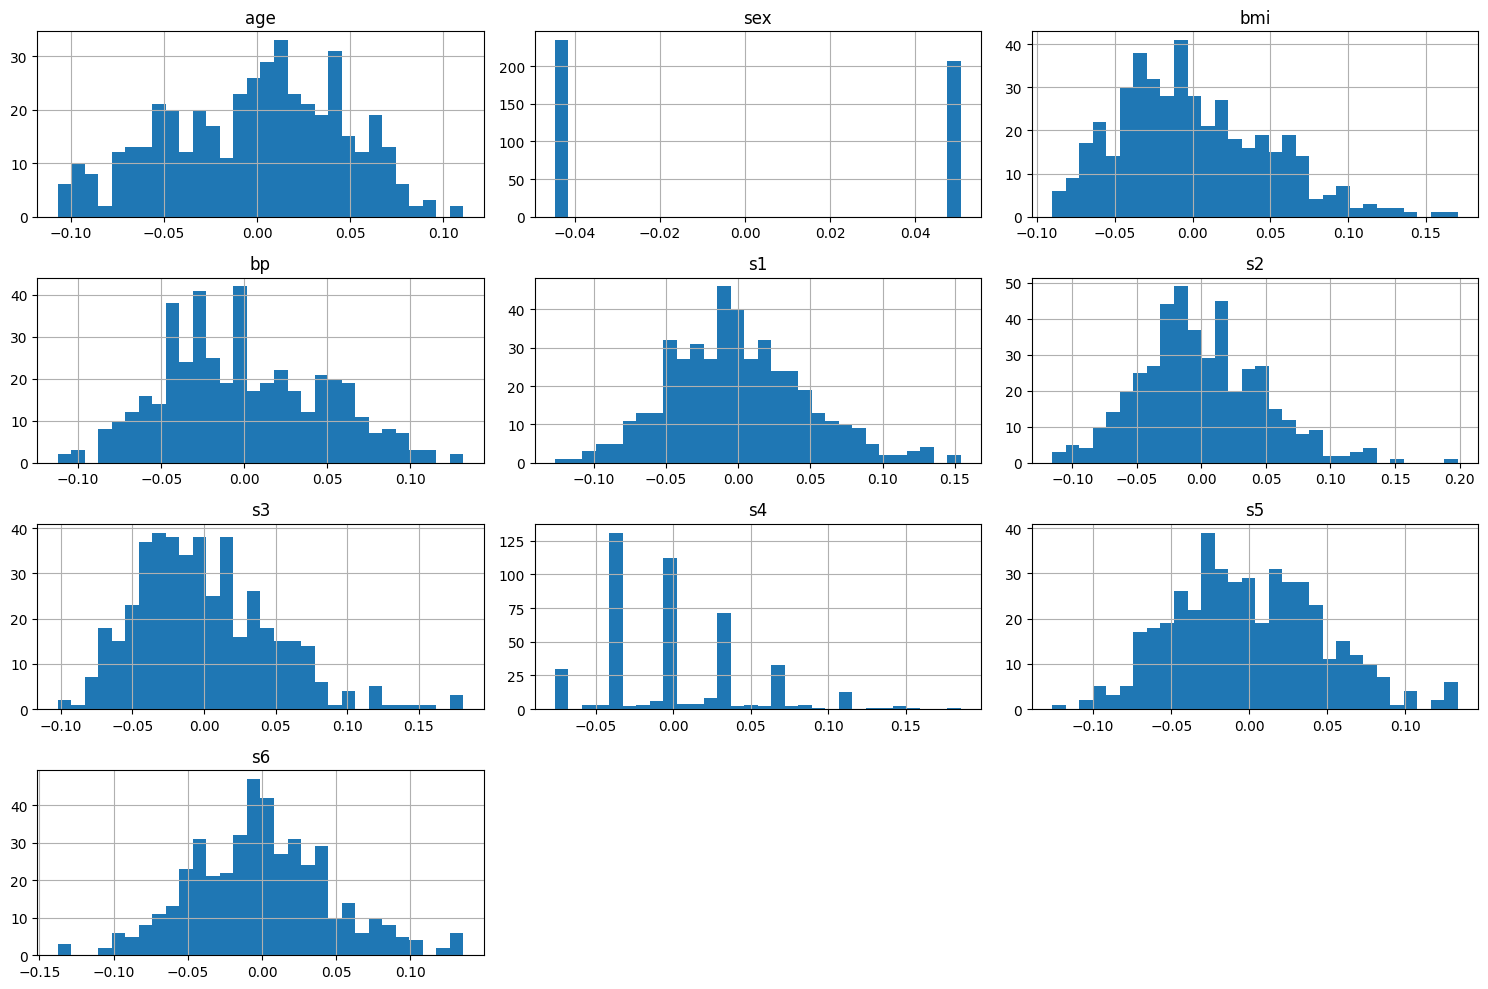


Null Values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


['maxabs_scaler.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
import joblib

# Load sample dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Task 1: Summary Statistics
print("Summary Statistics:\n", df.describe())

# Task 2: Visualize Data Distribution
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Task 3: Checking for Null Values
print("\nNull Values:\n", df.isnull().sum())

# Task 4: Drop Missing Values
df_dropped = df.dropna()

# Task 5: Fill Missing Values
df_filled = df.fillna(df.mean(numeric_only=True))

# Task 6: Handling Outliers with Capping
for col in df_filled.select_dtypes(include=np.number).columns:
    q1 = df_filled[col].quantile(0.25)
    q3 = df_filled[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_filled[col] = np.where(df_filled[col] < lower, lower,
                              np.where(df_filled[col] > upper, upper, df_filled[col]))

# Task 7: Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_filled), columns=df_filled.columns)

# Task 8: Robust Scaling
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_filled), columns=df_filled.columns)

# Task 9: MaxAbs Scaling
maxabs_scaler = MaxAbsScaler()
df_maxabs_scaled = pd.DataFrame(maxabs_scaler.fit_transform(df_filled), columns=df_filled.columns)

# Task 10: Log Data Preprocessing Steps
preprocessing_steps = [
    "Loaded sample diabetes dataset",
    "Displayed summary statistics",
    "Visualized distributions",
    "Checked for nulls",
    "Dropped or filled missing values",
    "Handled outliers with capping",
    "Applied Min-Max, Robust, and MaxAbs scaling"
]
with open('preprocessing_log.txt', 'w') as f:
    for step in preprocessing_steps:
        f.write(step + '\n')

# Task 11: Store Transformation Parameters
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')
joblib.dump(robust_scaler, 'robust_scaler.pkl')
joblib.dump(maxabs_scaler, 'maxabs_scaler.pkl')
